In [1]:
# import library
import tensorflow as tf
import numpy as np
import sys, os,cv2
from scipy.misc import imread,imresize
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imgaug import augmenters as iaa
import imgaug as ia
from scipy.ndimage import zoom
from sklearn.utils import shuffle
import matplotlib.animation as animation
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs,make_moons,make_swiss_roll

plt.style.use('seaborn')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

(4000, 2)


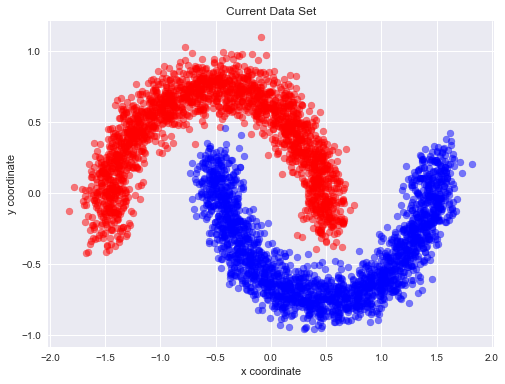

In [25]:
# load some data set
n_samples = 4000
X, y = make_moons(n_samples=n_samples, random_state=123,noise=0.1)
X    = X - X.mean(0,keepdims=True)
plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red',  alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Current Data Set'); plt.ylabel('y coordinate'); plt.xlabel('x coordinate'); plt.grid(True)
plt.show()

In [96]:
import pywt,sys
import os, random
import numpy as np


class SPC(object):
    def __init__(self, number_of_components,max_iter=10, threshold_val=1.5 ):
        
        
        """Initialize the SPC object
        
        Positional arguments:
        number_of_components -- the number of sparse principal components 
        to compute, must be between 1 and p (total number of features)
        
        Keyword argument:
        max_iter -- the number of iterations to perform (default=10)
        threshold_val -- value of the lambda regularisation 
        parameter (default=10)
        """
        self.number_of_components=number_of_components
        self.max_iter=max_iter
        self.threshold_val=threshold_val
    
    def fit(self, X_):
        """learn the sparse pc of a data matrix, return sparse estimates
        of the left and right singular vectors (U and V respectively) 
        as well as the standard principal components loading matrix W
    
        Positional arguments:
        X_ -- training data matrix, as numpy ndarray
        
        """ 
        print("computing sparse principal components...")
        print("computing SVD of data matrix...")
        U, s, V = np.linalg.svd(X_, full_matrices=True)  
        cnt = 0
        self.U = U
        self.W=V.T
        def normalize(vector):
            norm=np.linalg.norm(vector)
            if norm>0:
                return vector/norm
            else:
                return vector
        print("starting iterations...")
        while True:
           
            self.V = pywt.threshold(np.dot(U[:self.number_of_components],X_), self.threshold_val)
            self.U = np.dot(self.V,X_.T)
            self.U = np.array([normalize(u_i) for u_i in self.U])
            if cnt%2==0:
                print("{} out of {} iterations".format(cnt,self.max_iter))
            cnt += 1
            if cnt == self.max_iter:
                self.V = np.array([normalize(v_i) for v_i in self.V])
                break
        print("...finish")
        return self.U, self.V, self.W
    
    def transform(self, X_, k=2):
        X_reduced_spca = np.dot(X_, np.dot(self.V[:k].T, self.V[:k]))
        return X_reduced_spca
    
my_spca = SPC(2,max_iter=1000)
U,V,W = my_spca.fit(X)

computing sparse principal components...
computing SVD of data matrix...
starting iterations...
0 out of 1000 iterations
2 out of 1000 iterations
4 out of 1000 iterations
6 out of 1000 iterations
8 out of 1000 iterations
10 out of 1000 iterations
12 out of 1000 iterations
14 out of 1000 iterations
16 out of 1000 iterations
18 out of 1000 iterations
20 out of 1000 iterations
22 out of 1000 iterations
24 out of 1000 iterations
26 out of 1000 iterations
28 out of 1000 iterations
30 out of 1000 iterations
32 out of 1000 iterations
34 out of 1000 iterations
36 out of 1000 iterations
38 out of 1000 iterations
40 out of 1000 iterations
42 out of 1000 iterations
44 out of 1000 iterations
46 out of 1000 iterations
48 out of 1000 iterations
50 out of 1000 iterations
52 out of 1000 iterations
54 out of 1000 iterations
56 out of 1000 iterations
58 out of 1000 iterations
60 out of 1000 iterations
62 out of 1000 iterations
64 out of 1000 iterations
66 out of 1000 iterations
68 out of 1000 iterations

940 out of 1000 iterations
942 out of 1000 iterations
944 out of 1000 iterations
946 out of 1000 iterations
948 out of 1000 iterations
950 out of 1000 iterations
952 out of 1000 iterations
954 out of 1000 iterations
956 out of 1000 iterations
958 out of 1000 iterations
960 out of 1000 iterations
962 out of 1000 iterations
964 out of 1000 iterations
966 out of 1000 iterations
968 out of 1000 iterations
970 out of 1000 iterations
972 out of 1000 iterations
974 out of 1000 iterations
976 out of 1000 iterations
978 out of 1000 iterations
980 out of 1000 iterations
982 out of 1000 iterations
984 out of 1000 iterations
986 out of 1000 iterations
988 out of 1000 iterations
990 out of 1000 iterations
992 out of 1000 iterations
994 out of 1000 iterations
996 out of 1000 iterations
998 out of 1000 iterations
...finish


(4000, 2)


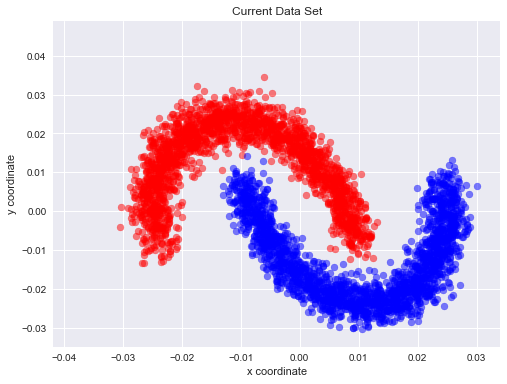

In [98]:
UT = U.T 
print(UT.shape)
plt.figure(figsize=(8,6))
plt.scatter(UT[y==0, 0], UT[y==0, 1], color='red',  alpha=0.5)
plt.scatter(UT[y==1, 0], UT[y==1, 1], color='blue', alpha=0.5)
plt.title('Current Data Set'); plt.ylabel('y coordinate'); plt.xlabel('x coordinate'); plt.grid(True)
plt.show()

In [125]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition
from numpy.random import RandomState

n_row, n_col = 2, 3
n_components = n_row * n_col
dataset = fetch_olivetti_faces(shuffle=True,random_state=RandomState(0))
faces = dataset.data
print(faces.shape)
n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

my_spca = SPC(100,max_iter=1000)
U,V,W = my_spca.fit(faces_centered)

(400, 4096)
computing sparse principal components...
computing SVD of data matrix...
starting iterations...
0 out of 1000 iterations
2 out of 1000 iterations
4 out of 1000 iterations
6 out of 1000 iterations
8 out of 1000 iterations
10 out of 1000 iterations
12 out of 1000 iterations
14 out of 1000 iterations
16 out of 1000 iterations
18 out of 1000 iterations
20 out of 1000 iterations
22 out of 1000 iterations
24 out of 1000 iterations
26 out of 1000 iterations
28 out of 1000 iterations
30 out of 1000 iterations
32 out of 1000 iterations
34 out of 1000 iterations
36 out of 1000 iterations
38 out of 1000 iterations
40 out of 1000 iterations
42 out of 1000 iterations
44 out of 1000 iterations
46 out of 1000 iterations
48 out of 1000 iterations
50 out of 1000 iterations
52 out of 1000 iterations
54 out of 1000 iterations
56 out of 1000 iterations
58 out of 1000 iterations
60 out of 1000 iterations
62 out of 1000 iterations
64 out of 1000 iterations
66 out of 1000 iterations
68 out of 100

620 out of 1000 iterations
622 out of 1000 iterations
624 out of 1000 iterations
626 out of 1000 iterations
628 out of 1000 iterations
630 out of 1000 iterations
632 out of 1000 iterations
634 out of 1000 iterations
636 out of 1000 iterations
638 out of 1000 iterations
640 out of 1000 iterations
642 out of 1000 iterations
644 out of 1000 iterations
646 out of 1000 iterations
648 out of 1000 iterations
650 out of 1000 iterations
652 out of 1000 iterations
654 out of 1000 iterations
656 out of 1000 iterations
658 out of 1000 iterations
660 out of 1000 iterations
662 out of 1000 iterations
664 out of 1000 iterations
666 out of 1000 iterations
668 out of 1000 iterations
670 out of 1000 iterations
672 out of 1000 iterations
674 out of 1000 iterations
676 out of 1000 iterations
678 out of 1000 iterations
680 out of 1000 iterations
682 out of 1000 iterations
684 out of 1000 iterations
686 out of 1000 iterations
688 out of 1000 iterations
690 out of 1000 iterations
692 out of 1000 iterations
6

In [129]:
# reconstruction of the images
X_reduced_spca = np.dot(faces_centered, np.dot(V[:100].T, V[:100] ))
print(X_reduced_spca.shape)

(400, 4096)


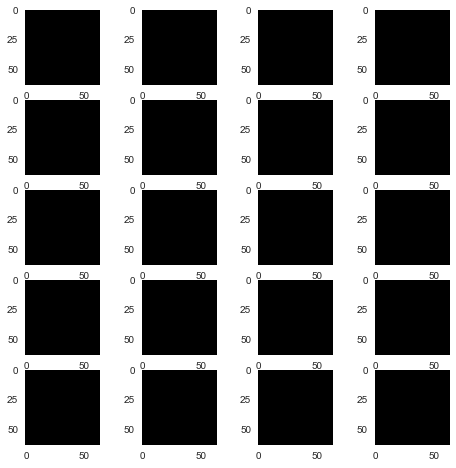

In [130]:
X_reduced_spca = X_reduced_spca.reshape((400,64,64))
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_reduced_spca[i-1],cmap='gray')
    plt.grid(False)
plt.show()

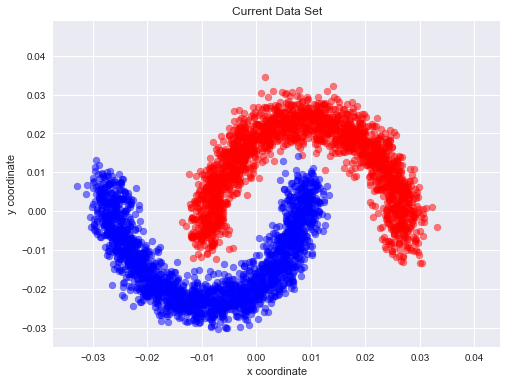

In [87]:
from sklearn.decomposition import SparsePCA
sk_sparse = SparsePCA(n_components=2,max_iter=7000,alpha=0.05)
data = sk_sparse.fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(data[y==0, 0], data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(data[y==1, 0], data[y==1, 1], color='blue', alpha=0.5)
plt.title('Current Data Set'); plt.ylabel('y coordinate'); plt.xlabel('x coordinate'); plt.grid(True)
plt.show()
temp = sk_sparse.components_ 

In [89]:
print(temp)

[[-55.05796819   0.        ]
 [  0.          31.84590506]]


In [11]:
temp = np.asarray([
    [1,2,3,4,5]
])
print(np.linalg.norm(temp))
print(np.sqrt( (temp ** 2).sum()) )

7.416198487095663
7.416198487095663


# Reference
1. tf.set_random_seed | TensorFlow. (2018). TensorFlow. Retrieved 28 October 2018, from https://www.tensorflow.org/api_docs/python/tf/set_random_seed
2. Comparing different hierarchical linkage methods on toy datasets — scikit-learn 0.20.0 documentation. (2018). Scikit-learn.org. Retrieved 28 October 2018, from http://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py
3. VanderPlas, J. (2018). Multiple Subplots | Python Data Science Handbook. Jakevdp.github.io. Retrieved 28 October 2018, from https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
4. object, M. (2018). Matplotlib returning a plot object. Stack Overflow. Retrieved 28 October 2018, from https://stackoverflow.com/questions/43925337/matplotlib-returning-a-plot-object
5. Plot randomly generated classification dataset — scikit-learn 0.20.0 documentation. (2018). Scikit-learn.org. Retrieved 28 October 2018, from http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html#sphx-glr-auto-examples-datasets-plot-random-dataset-py
6. 5. Dataset loading utilities — scikit-learn 0.20.0 documentation. (2018). Scikit-learn.org. Retrieved 28 October 2018, from http://scikit-learn.org/stable/datasets/index.html
7. mplot3d tutorial — Matplotlib 2.0.2 documentation. (2018). Matplotlib.org. Retrieved 28 October 2018, from https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
8. matplotlib, H. (2018). How to plot vectors in python using matplotlib. Stack Overflow. Retrieved 28 October 2018, from https://stackoverflow.com/questions/42281966/how-to-plot-vectors-in-python-using-matplotlib
9. arrow, M. (2018). Matplotlib legend for an arrow. Stack Overflow. Retrieved 28 October 2018, from https://stackoverflow.com/questions/22348229/matplotlib-legend-for-an-arrow
10. plt colors - Google Search. (2018). Google.ca. Retrieved 28 October 2018, from https://www.google.ca/search?q=plt+colors&rlz=1C1CHBF_enCA771CA771&oq=plt+colors&aqs=chrome..69i57j0l5.1038j0j7&sourceid=chrome&ie=UTF-8
11. Brownlee, J. (2018). A Gentle Introduction to Singular-Value Decomposition for Machine Learning. Machine Learning Mastery. Retrieved 28 October 2018, from https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/
12. https://www.quora.com/Why-do-we-need-to-center-the-data-for-Principle-Components-Analysis
13. Distance Matrix Vectorization Trick – Manifold Blog – Medium. (2016). Medium. Retrieved 29 October 2018, from https://medium.com/dataholiks-distillery/l2-distance-matrix-vectorization-trick-26aa3247ac6c
14. (pdist), H. (2018). How does condensed distance matrix work? (pdist). Stack Overflow. Retrieved 29 October 2018, from https://stackoverflow.com/questions/13079563/how-does-condensed-distance-matrix-work-pdist
15. aboyker/easyspc. (2018). GitHub. Retrieved 29 October 2018, from https://github.com/aboyker/easyspc/blob/master/build/lib/easyspc/__init__.py
16. numpy.linalg.norm — NumPy v1.15 Manual. (2018). Docs.scipy.org. Retrieved 29 October 2018, from https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html
17. matrix, C. (2018). Calculating norm of columns as vectors in a matrix. Stack Overflow. Retrieved 29 October 2018, from https://stackoverflow.com/questions/15725611/calculating-norm-of-columns-as-vectors-in-a-matrixa
18. [duplicate], H. (2018). How to display multiple images in one figure correctly?. Stack Overflow. Retrieved 29 October 2018, from https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly
19. Faces dataset decompositions — scikit-learn 0.20.0 documentation. (2018). Scikit-learn.org. Retrieved 29 October 2018, from http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py
20. 